#### 🎯 Machine Learning Explainability

Machine learning models are often seen as **black boxes**, especially complex ones. But when you're:

* Making **important decisions** (e.g., loan approvals, diagnoses),
* Facing **regulatory requirements** (like GDPR),
* Or just trying to **debug** a model,

…you need to understand **why** the model makes the predictions it does.

---

#### 📘 Course Breakdown

---

#### 1. **The Importance of Explainability**

* Understand when and why explainability is necessary
* Compare **simple interpretable models** (like linear regression) to **complex ones** (like XGBoost)
* Introduce the tradeoff: **Accuracy vs Interpretability**

📌 Example:

* A decision tree is more interpretable than a neural network — but might perform worse.

---

#### 2. **Permutation Importance**

* Measures how much each feature **matters** to a trained model
* Idea: **Randomly shuffle** a feature and see how performance drops

📌 Example:

```python
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X_val, y_val, scoring='accuracy')
```

🧠 If model accuracy drops a lot when a feature is shuffled, that feature is **important**.

✅ Works with **any model**, even black-box ones.

---

#### 3. **Partial Dependence Plots (PDPs)**

* Show how changing a feature **impacts predictions**, **on average**
* Helps you visualize:

  * Linear or nonlinear relationships
  * Threshold effects

📌 Example:

```python
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(model, X_val, ['age'])
```

🧠 Good for **global insights** (how a feature affects predictions overall).

---

#### 4. **SHAP Values**

* SHAP (SHapley Additive exPlanations) provides **individual prediction explanations**
* Based on game theory (Shapley values from cooperative games)
* Breaks each prediction into a **sum of feature contributions**

📌 Example:

```python
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)
```

You can then plot the results to see **which features pushed a prediction higher or lower**.

✅ **Most powerful and detailed** explainability method covered

---

#### 5. **Advanced Uses of SHAP Values**

* Visualize SHAP values:

  * **Force plots** for individual predictions
  * **Summary plots** to show top features globally
  * **Dependence plots** for interactions

📌 Example: SHAP Summary Plot

```python
shap.summary_plot(shap_values, X_val)
```

🧠 These plots can help you:

* Debug models
* Detect bias
* Build trust with stakeholders

---

#### 🛠️ Tools Used

* **scikit-learn** (for modeling and evaluation)
* **XGBoost** (for non-linear models)
* **shap** (Python SHAP library)
* **matplotlib** and **pdpbox** for plotting

---

#### ✅ **Skills You'll Gain**

* Interpret model predictions using:

  * Permutation importance
  * Partial dependence plots
  * SHAP values
* Know when and how to apply explainability techniques
* Communicate model insights to non-technical audiences
* Debug or audit models for bias and fairness

---

#### **Would you like:**

* A SHAP notebook example on a real dataset?
* A comparison of SHAP vs permutation importance?
* Advice on how to explain your model to non-technical stakeholders?


In [6]:
# Step 1: Install required libraries (only run this if not installed)
# !pip install shap xgboost scikit-learn

# Step 2: Import libraries
import shap
import xgboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 3: Load a simple dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 4: Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train an XGBoost model (tree-based model)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# Step 6: Use SHAP to explain predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# Step 7: Visualize SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_val[0])

In [5]:
!uv add shap
!uv add xgboost

Resolved 206 packages in 28ms
Audited 201 packages in 1ms
Resolved 208 packages in 2.50s
Prepared 1 package in 21.38s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 60ms
 + xgboost==3.0.5


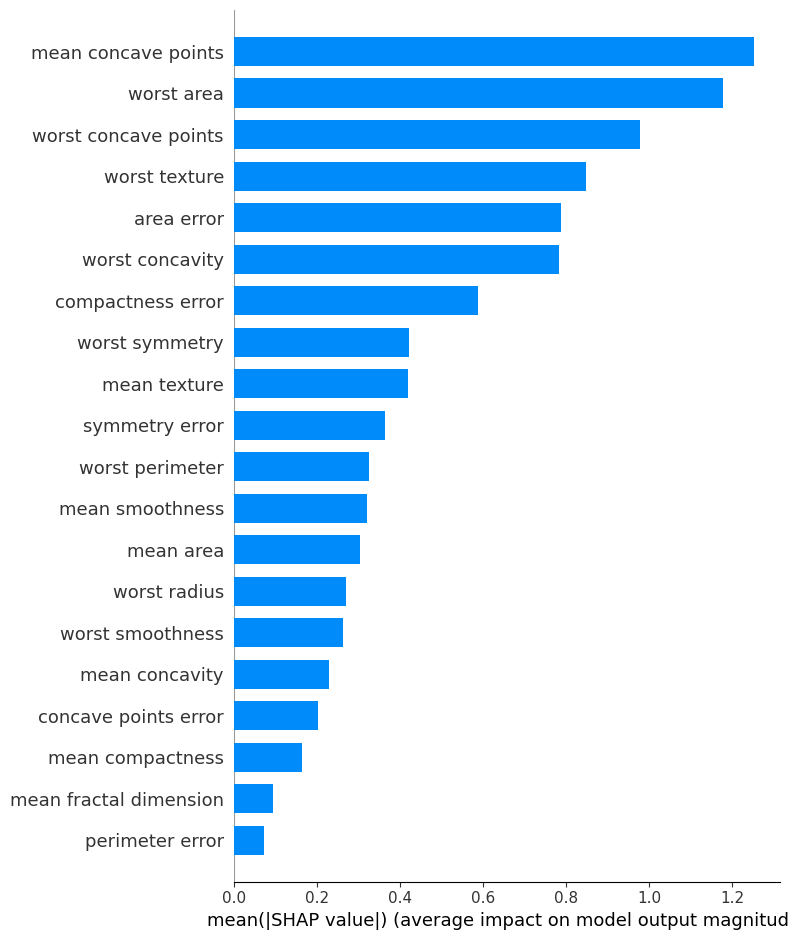

In [12]:
# Summary bar chart of feature importance using SHAP values
shap.summary_plot(shap_values, X_val, plot_type="bar", feature_names=data.feature_names)

Predictions: [1 1 1]


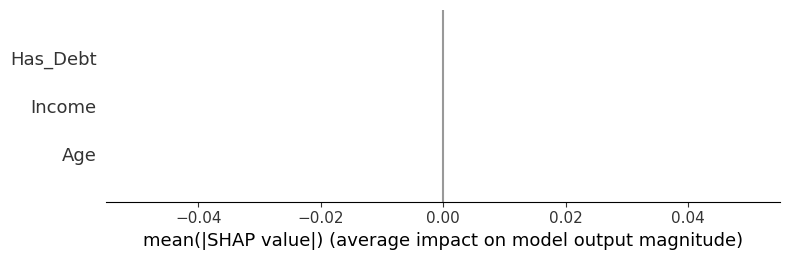

In [20]:
import shap
import xgboost
import pandas as pd
from sklearn.model_selection import train_test_split

# 👇 Slightly larger, more balanced dataset
data = pd.DataFrame(
    {
        "Age": [25, 45, 35, 50, 23, 30, 40, 60, 55, 28],
        "Income": [
            50000,
            100000,
            75000,
            120000,
            40000,
            65000,
            85000,
            110000,
            105000,
            48000,
        ],
        "Has_Debt": [1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
        "Buys_House": [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],  # Target
    }
)

# Define X and y
X = data[["Age", "Income", "Has_Debt"]]
y = data["Buys_House"]

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = xgboost.XGBClassifier(n_estimators=20, eval_metric="logloss")
model.fit(X_train, y_train)

# Make predictions
print("Predictions:", model.predict(X_val))  # Should NOT all be 1s now

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# Handle case where shap_values is a list (binary classification)
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_val, plot_type="bar")
else:
    shap.summary_plot(shap_values, X_val, plot_type="bar")

Resolved 208 packages in 1ms
Audited 202 packages in 0.10ms


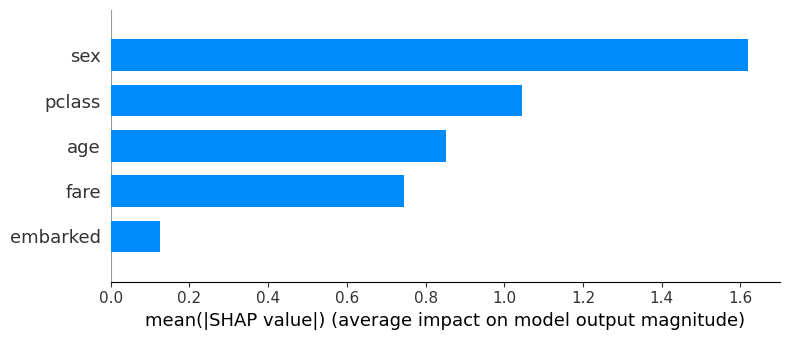

In [23]:
# Step 1: Install required packages (run if needed)
!uv add shap xgboost seaborn scikit-learn pandas

# Step 2: Imports
import shap
import xgboost
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 3: Load Titanic dataset
df = sns.load_dataset('titanic')

# Step 4: Clean and preprocess
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].dropna()

# Encode categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])          # male=1, female=0
df['embarked'] = le_embarked.fit_transform(df['embarked'])  # C=0, Q=1, S=2 (or similar)

# Step 5: Define features and target
X = df.drop(columns='survived')
y = df['survived']

# Step 6: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train XGBoost model
model = xgboost.XGBClassifier(n_estimators=50, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 8: SHAP Explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# Step 9: SHAP summary bar plot
shap.summary_plot(shap_values, X_val, plot_type="bar")
